# Group members :
## <font color='red'>Shah Hussain (CS-19133)</font>
## <font color='red'>Areeba Fayyaz (CS-19105)</font>
## <font color='red'>Ala Uddin Taha (CS-19305)</font>


### Imports

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import ipywidgets as widgets

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Reading dataset

In [144]:
data=pd.read_csv('The_Grades_Dataset.csv')

# <font color='red'>Data Preprocessing</font>

In [145]:
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [146]:
 # unnecessary column
data=data.drop(["Seat No."],axis=1)
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [147]:
data['PH-121'].value_counts()

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

### Ordinal Encoding

In [148]:
gradeDict={"WU":0,"W":1,"I":2,"F":3,"D-":4,'D':5,"D+":6,"C-":7,"C":8,'C+':9,"B-":10,
           "B":11,"B+":12,"A-":13,'A':14,"A+":15}

columns=['PH-121','HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107','CS-107','HS-205/20'\
         ,'MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217','CS-212','CS-215','MT-331','EF-303'\
         ,'HS-304','CS-301','CS-302','TC-383','MT-442','EL-332','CS-318','CS-306','CS-312','CS-317','CS-403','CS-421'\
         ,'CS-406','CS-414','CS-419','CS-423','CS-412']

for column in columns:
    data[column]=data[column].replace(gradeDict)
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,10,6,7.0,8.0,7.0,6,5.0,7.0,10.0,7.0,...,7.0,7.0,7.0,7.0,13.0,14.0,7.0,11.0,13.0,2.205
1,14,5,6.0,5.0,10.0,8,5.0,14.0,6.0,5.0,...,6.0,5.0,8.0,5.0,13.0,10.0,8.0,8.0,11.0,2.008
2,14,11,14.0,10.0,12.0,14,10.0,12.0,13.0,13.0,...,11.0,11.0,14.0,8.0,14.0,14.0,14.0,13.0,14.0,3.608
3,5,9,6.0,5.0,5.0,13,6.0,7.0,5.0,9.0,...,6.0,8.0,6.0,7.0,10.0,11.0,9.0,9.0,9.0,1.906
4,13,13,13.0,12.0,14.0,14,13.0,12.0,14.0,13.0,...,10.0,12.0,12.0,10.0,13.0,14.0,13.0,13.0,14.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,11,14,14.0,13.0,15.0,14,13.0,13.0,15.0,12.0,...,13.0,13.0,14.0,14.0,14.0,12.0,12.0,11.0,14.0,3.798
567,15,14,14.0,14.0,14.0,14,14.0,13.0,14.0,14.0,...,12.0,12.0,14.0,14.0,13.0,11.0,13.0,8.0,13.0,3.772
568,11,14,13.0,12.0,14.0,14,14.0,14.0,14.0,11.0,...,13.0,11.0,14.0,12.0,14.0,8.0,12.0,13.0,13.0,3.470
569,14,12,5.0,14.0,5.0,6,10.0,7.0,10.0,7.0,...,5.0,11.0,11.0,7.0,5.0,8.0,11.0,10.0,8.0,2.193


In [149]:
print(data.isnull().sum())

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64


### Filling empty cells with Mode of each column

In [150]:
#type of NAn is float

for column in columns:
    
    if (data[column].isnull().sum())!=0:
        data[column] = data[column].fillna(data[column].mode()[0])
    data[column] = data[column].astype(int)
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,10,6,7,8,7,6,5,7,10,7,...,7,7,7,7,13,14,7,11,13,2.205
1,14,5,6,5,10,8,5,14,6,5,...,6,5,8,5,13,10,8,8,11,2.008
2,14,11,14,10,12,14,10,12,13,13,...,11,11,14,8,14,14,14,13,14,3.608
3,5,9,6,5,5,13,6,7,5,9,...,6,8,6,7,10,11,9,9,9,1.906
4,13,13,13,12,14,14,13,12,14,13,...,10,12,12,10,13,14,13,13,14,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,11,14,14,13,15,14,13,13,15,12,...,13,13,14,14,14,12,12,11,14,3.798
567,15,14,14,14,14,14,14,13,14,14,...,12,12,14,14,13,11,13,8,13,3.772
568,11,14,13,12,14,14,14,14,14,11,...,13,11,14,12,14,8,12,13,13,3.470
569,14,12,5,14,5,6,10,7,10,7,...,5,11,11,7,5,8,11,10,8,2.193


# <font color='red'>MODEL 2 : predict final CGPA based on GPs of first two years.</font>


In [262]:
#separating features
X2=data[['PH-121','HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107',
         'CS-107','HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217',
         'CS-212','CS-215']]
X2.shape

#separating target
Y=data[["CGPA"]]

Y

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448
...,...
566,3.798
567,3.772
568,3.470
569,2.193


### Splitting the datset into training and testing datasets

In [289]:
X_train,X_test,Y_train,Y_test = train_test_split(X2, Y,test_size=0.4,random_state=4)

# Model 2 : Linear Regression 

In [290]:
#Creates an object of LinearRegression type
algo1_model2_lin=LinearRegression()

#Does the training to select optimal values of the parameters
algo1_model2_lin.fit(X_train,Y_train)

#testing our model
Y_pred = algo1_model2_lin.predict(X_test)
Y_pred

array([[3.86432393],
       [2.78280045],
       [3.5893989 ],
       [3.3637252 ],
       [2.48959281],
       [3.26426088],
       [2.64642343],
       [1.54813585],
       [2.34576705],
       [2.9912923 ],
       [3.53482536],
       [3.27186773],
       [3.03579773],
       [3.4967379 ],
       [3.41618479],
       [3.56729425],
       [3.34278752],
       [3.8307551 ],
       [3.06229775],
       [3.42386808],
       [3.28082299],
       [2.91528305],
       [3.31440405],
       [3.62204202],
       [3.91723001],
       [3.44973498],
       [2.39896112],
       [2.46732388],
       [3.48133998],
       [3.65103366],
       [2.36022175],
       [2.39576534],
       [2.73381611],
       [3.43267456],
       [3.76620885],
       [3.70407371],
       [3.88868333],
       [3.23468245],
       [2.40875301],
       [2.82442371],
       [2.78540753],
       [2.52185498],
       [3.49736341],
       [1.78202108],
       [2.49444438],
       [2.14122639],
       [3.10894939],
       [3.443

### Evalution metrics used :
#### 1 - R-squared score i.e : percentage of correct predictions  returned by our model. 
#### $$R-square = 1- \frac{\sum_{i=1}^{n} \big( y^{(i)} - predicted^{(i)} \big)^2}{\sum_{i=1}^{n} \big( y^{(i)} - y' \big)^2}  $$
#### 2 - Mean Squared Error (MSE)
#### $$MSE = \frac{\sum_{i=1}^{n} \big( y^{(i)} - predicted^{(i)} \big)^2}{2n}  $$

#### 3 - Root Mean Squared Error (RMSE)
#### $$RMSE = \sqrt{\frac{\sum_{i=1}^{n} \big( y^{(i)} - predicted^{(i)} \big)^2}{n} } $$

#### 4 - Mean Absolute Error (MAE)
#### $$MAE = \frac{\sum_{i=1}^{n} \big| y^{(i)} - predicted^{(i)} \big|}{n}$$

## Evaluating Linear Regression 

In [291]:
#1 - R-squared score
#96% of model predictions are correct

model2_algo1=algo1_model2_lin.score(X_test,Y_test)
print('Training data r-square:', algo1_model2_lin.score(X_train, Y_train)*100,"%")
print('Testing data r-square:', algo1_model2_lin.score(X_test,Y_test)*100,"%")

# 2 - Mean Squared Error (MSE)
mse_model2_algo1=mean_squared_error(Y_test,Y_pred)
print('Mean squared Error:', round(mse_model2_algo1,4))

# 3 - Root Mean Squared Error (RMSE)
rmse_model2_algo1=mean_squared_error(Y_test,Y_pred,squared=False)
print('Root Mean squared Error:', round(rmse_model2_algo1,4))

# 4 - Mean Absolute Error (MAE)
mae_model2_algo1=mean_absolute_error(Y_test,Y_pred)
print('Mean Absolute Error:', round(mae_model2_algo1,4))

Training data r-square: 89.72870388784987 %
Testing data r-square: 92.08820128378905 %
Mean squared Error: 0.0267
Root Mean squared Error: 0.1634
Mean Absolute Error: 0.1307


#  Model 2 : Polynomial Regression

In [292]:
X_train_poly2=PolynomialFeatures(degree=3).fit_transform(X_train)
X_train_poly2=pd.DataFrame(X_train_poly2)
X_train_poly2=X_train_poly2.drop([0],axis=1)

algo2_model2_poly=LinearRegression()
algo2_model2_poly.fit(X_train_poly2,Y_train)

X_test_poly2=PolynomialFeatures(degree=3).fit_transform(X_test)
X_test_poly2=pd.DataFrame(X_test_poly2)
X_test_poly2=X_test_poly2.drop([0],axis=1)
Y_pred = algo2_model2_poly.predict(X_test_poly2)

## Evaluating Polynomial Regression 

In [293]:
#1 - R-squared score
#87% of model predictions are correct
model2_algo2=algo2_model2_poly.score(X_test_poly2,Y_test)
print('Training data r-square:', algo2_model2_poly.score(X_train_poly2, Y_train)*100,"%")
print('Test data r-square:', algo2_model2_poly.score(X_test_poly2, Y_test)*100,"%")

# 2 - Mean Squared Error (MSE)
mse_model2_algo2=mean_squared_error(Y_test,Y_pred)
print('Mean squared Error:', round(mse_model2_algo2,4))

# 3 - Root Mean Squared Error (RMSE)
rmse_model2_algo2=mean_squared_error(Y_test,Y_pred,squared=False)
print('Root Mean squared Error:', round(rmse_model2_algo2,4))

# 4 - Mean Absolute Error (MAE)
mae_model2_algo2=mean_absolute_error(Y_test,Y_pred)
print('Mean Absolute Error:', round(mae_model2_algo2,4))


Training data r-square: 100.0 %
Test data r-square: 68.97353751372893 %
Mean squared Error: 0.1047
Root Mean squared Error: 0.3235
Mean Absolute Error: 0.2409


# <font color='red'>MODEL 3 : predict final CGPA based on GPs of first three years.</font>


In [275]:
#Separting features
X3=data[['PH-121','HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107','CS-107','HS-205/20'\
         ,'MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217','CS-212','CS-215','MT-331','EF-303'\
         ,'HS-304','CS-301','CS-302','TC-383','EL-332','CS-318','CS-306','CS-312','CS-317']]

iloc[]

# Splitting the datset
X_train,X_test,Y_train,Y_test = train_test_split(X3, Y,test_size=0.2,random_state=4)

SyntaxError: invalid syntax (3780072787.py, line 6)

# Model 3 : Linear Regression

In [276]:
#Creates an object of LinearRegression type
algo1_model3_lin=LinearRegression()
#Does the training to select optimal values of the parameters
algo1_model3_lin.fit(X_train,Y_train)

#testing our model
Y_pred = algo1_model3_lin.predict(X_test)

## Evaluating Linear Regression 

In [277]:
#1 - R-squared score
#96% of model predictions are correct
print('Training data r-square:', algo1_model3_lin.score(X_train,Y_train)*100,"%")
print('Testing data r-square:', algo1_model3_lin.score(X_test,Y_test)*100,"%")

# 2 - Mean Squared Error (MSE)
mse_model3_algo1=mean_squared_error(Y_test,Y_pred)
print('Mean squared Error:', round(mse_model3_algo1,4))

# 3 - Root Mean Squared Error (RMSE)]''
rmse_model3_algo1=mean_squared_error(Y_test,Y_pred,squared=False)
print('Root Mean squared Error:', round(rmse_model3_algo1,4))

# 4 - Mean Absolute Error (MAE)
mae_model3_algo1=mean_absolute_error(Y_test,Y_pred)
print('Mean Absolute Error:', round(mae_model3_algo1,4))



Training data r-square: 90.5575583876277 %
Testing data r-square: 92.54803081686374 %
Mean squared Error: 0.0248
Root Mean squared Error: 0.1575
Mean Absolute Error: 0.1223


#  Model 3 : Support Vector Regression (SVR)


In [278]:
algo2_model3_svr = SVR(kernel = 'linear')
algo2_model3_svr.fit(X_train, Y_train)

#predicting our model
Y_pred = algo2_model3_svr.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluating Support Vector Regression 

In [91]:
#1 - R-squared score
#96% of model predictions are correct
model3_algo2=algo2_model3_svr.score(X_test,Y_test)
print('Training data r-square:', algo2_model3_svr.score(X_train,Y_train)*100,"%")
print('Testing data r-square:', algo2_model3_svr.score(X_test,Y_test)*100,"%")

# 2 - Mean Squared Error (MSE)
mse_model3_algo2=mean_squared_error(Y_test,Y_pred)
print('Mean squared Error:', round(mse_model3_algo2,4))

# 3 - Root Mean Squared Error (RMSE)
rmse_model3_algo2=mean_squared_error(Y_test,Y_pred,squared=False)
print('Root Mean squared Error:', round(rmse_model3_algo2,4))

# 4 - Mean Absolute Error (MAE)
mae_model3_algo2=mean_absolute_error(Y_test,Y_pred)
print('Mean Absolute Error:', round(mae_model3_algo2,4))

Training data r-square: 92.07064699699431 %
Testing data r-square: 97.95231706560703 %
Mean squared Error: 0.0068
Root Mean squared Error: 0.0826
Mean Absolute Error: 0.0621


# <font color='red'>Comparison</font>


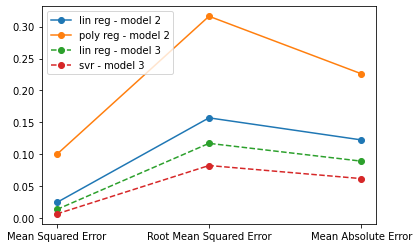

In [92]:
xpoints = np.array(['Mean Squared Error', 'Root Mean Squared Error','Mean Absolute Error'])
ypoints1 = np.array([mse_model2_algo1, rmse_model2_algo1, mae_model2_algo1])
ypoints2 = np.array([mse_model2_algo2, rmse_model2_algo2, mae_model2_algo2])
ypoints3 = np.array([mse_model3_algo1, rmse_model3_algo1, mae_model3_algo1])
ypoints4 = np.array([mse_model3_algo2, rmse_model3_algo2, mae_model3_algo2])
plt.plot(xpoints, ypoints1,  label="lin reg - model 2", marker='o')
plt.plot(xpoints, ypoints2,  label="poly reg - model 2", marker='o')
plt.plot(xpoints, ypoints3,  label="lin reg - model 3", linestyle="--", marker='o')
plt.plot(xpoints, ypoints4,  label="svr - model 3", marker='o', linestyle="--")

plt.legend()
plt.show()

# <font color='red'></font>

# <font color='red'>UI</font>


In [93]:
# displaying heading
display(widgets.HTML('<br><b><center><font size="12">CGPA Prediction</font></center></b>'))


grades_options=[('A+', 15), ('A', 14), ('A-', 13),
                            ('B+', 12), ('B', 11), ('B-', 10),
                            ('C+', 9), ('C', 8), ('C-', 7),
                            ('D+', 6), ('D', 5), ('D-', 4), ('F', 3),
                            ('I', 2), ('W', 1), ('WU', 0)]
years=[("2 years",2),("3 years",3)]


model = widgets.Dropdown(
                    options=years,
                    value=2,
                    description="Model",
                )


display(widgets.HTML('<br><b><font size="4">Select model for prediction :</font></b>'))
display(model)

HTML(value='<br><b><center><font size="12">CGPA Prediction</font></center></b>')

HTML(value='<br><b><font size="4">Select model for prediction :</font></b>')

Dropdown(description='Model', options=(('2 years', 2), ('3 years', 3)), value=2)

In [94]:
display(widgets.HTML('<br><b><font size="4">Select an algorithm :</font></b>'))


model2_algos=widgets.Dropdown(options=[("Linear Regression Model",1),("Polynomial Regression Model",2)],value=1,description= 'Algorithm : ',)
model3_algos=widgets.Dropdown(options=[("Linear Regression Model",3),("Support Vector Regression",4)],value=3,description= 'Algorithm : ',)


grades_input=[]

# if user selects model 2, i.e: model for two years
if model.value == 2 :
    display(model2_algos)
    display(widgets.HTML('<br><b><font size="4">Select grades for each courses :</font></b>'))
    
    #displaying courses for input
    for column in X2.columns:
        column = widgets.Dropdown(
                    options=grades_options,
                    value=1,
                    description=column,)
        
        display(column)
        grades_input.append(column)
        
        
# if user selects model 3, i.e: model for three years
else:
    display(model3_algos)
    display(widgets.HTML('<br><b><font size="4">Select grades for each courses :</font></b>'))
    
    #displaying courses for input
    for column in X3.columns:
        column = widgets.Dropdown(
                    options=grades_options,
                    value=1,
                    description=column,)
        
        display(column)
        grades_input.append(column)


HTML(value='<br><b><font size="4">Select an algorithm :</font></b>')

Dropdown(description='Algorithm : ', options=(('Linear Regression Model', 1), ('Polynomial Regression Model', …

HTML(value='<br><b><font size="4">Select grades for each courses :</font></b>')

Dropdown(description='PH-121', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='HS-101', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='CY-105', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='HS-105/12', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11),…

Dropdown(description='MT-111', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='CS-105', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='CS-106', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='EL-102', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='EE-119', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='ME-107', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='CS-107', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='HS-205/20', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11),…

Dropdown(description='MT-222', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='EE-222', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='MT-224', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='CS-210', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='CS-211', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='CS-203', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='CS-214', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='EE-217', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='CS-212', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

Dropdown(description='CS-215', index=14, options=(('A+', 15), ('A', 14), ('A-', 13), ('B+', 12), ('B', 11), ('…

In [279]:
grades_list=[]

for grade in grades_input:
    grades_list.append(grade.value)
    

In [280]:
if model.value == 2 :
    
    # linear regression for model 2
    if model2_algos.value == 1:
        y=algo1_model2_lin.predict([grades_list])
        y = np.clip(y, 0, 4)
        
    # polynomial regression for model 2
    else:
        X_test_poly2=PolynomialFeatures(degree=3).fit_transform([grades_list])
        X_test_poly2=pd.DataFrame(X_test_poly2)
        X_test_poly2=X_test_poly2.drop([0],axis=1)
        y=algo2_model2_poly.predict(X_test_poly2)
        y = np.clip(y, 0, 4)
        
else:
   
    # linear regression for model 3
    if model3_algos.value == 3:
        y=algo1_model3_lin.predict([grades_list])
        y = np.clip(y, 0, 4)
        
    # SVR for model 3
    else:
        y=algo2_model3_svr.predict([grades_list])
        y = np.clip(y, 0, 4)
display(widgets.HTML('<br><b><font size="4">Predicted CGPA : </font></b>'))
print(y[0])

HTML(value='<br><b><font size="4">Predicted CGPA : </font></b>')

[0.76102095]
